 In each dataset, the independent variables will be our various factors, and GDP will be dependent variable.
 This will be done over how many ever years and use each year for validation.
 So, each year will have 2 datasets; one for developed(with n intances, one for n developed countries) and one for developing(with m, one intances for m developed countries).
 We can see how the dependencies for each changes over the years.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
def getDF(code):
    path = os.getcwd() + "\Datasets\\"
    newPath = path + code
    df = pd.read_csv(newPath + "\\" + os.listdir(newPath)[0])
    return df

## Getting the Data

In [3]:
GDP_PreCapitaGrowth = getDF("NY.GDP.PCAP.KD.ZG")
GvtExpenditureOnEduAsPercetageOfGDP = getDF("SE.XPD.TOTL.GD.ZS")
GiniIndex = getDF("SI.POV.GINI")
UnpemplymentAsPercentageOfLabourForce = getDF("SL.UEM.TOTL.ZS")
LifeExpectancy = getDF("SP.DYN.LE00.IN")
PopulationGrowth = getDF("SP.POP.GROW")
PovertyHeadcount = getDF("SI.POV.DDAY")
milExpenditure = getDF("MS.MIL.XPND.GD.ZS")

## Seperating Developing Countries with Developing Countries

In [4]:
Developed = ["Andorra","Austria","Belgium","Cyprus","Czech Republic","Denmark","Estonia","Faroe Islands","Finland","France","Germany","Greece","Guernsey","Holy See","Iceland","Ireland","Italy","Jersey","Latvia","Liechtenstein","Lithuania","Luxembourg","Malta","Monaco","Netherlands","Norway","Portugal","San Marino","Slovakia","Slovenia","Spain","Sweden","Switzerland","United Kingdom","Hong Kong","Israel","Japan","Macau","Singapore","South Korea","Taiwan","Bermuda","Canada","Puerto Rico","United States","Australia","New Zealand"]

In [5]:
GDP_PreCapitaGrowth_D = GDP_PreCapitaGrowth[GDP_PreCapitaGrowth["Country Name"].isin(Developed)]
GvtExpenditureOnEduAsPercetageOfGDP_D = GvtExpenditureOnEduAsPercetageOfGDP[GvtExpenditureOnEduAsPercetageOfGDP["Country Name"].isin(Developed)]
GiniIndex_D = GiniIndex[GiniIndex["Country Name"].isin(Developed)]
UnpemplymentAsPercentageOfLabourForce_D = UnpemplymentAsPercentageOfLabourForce[UnpemplymentAsPercentageOfLabourForce["Country Name"].isin(Developed)]
LifeExpectancy_D = LifeExpectancy[LifeExpectancy["Country Name"].isin(Developed)]
PopulationGrowth_D = PopulationGrowth[PopulationGrowth["Country Name"].isin(Developed)]
povHeadcount_D = PovertyHeadcount[PovertyHeadcount["Country Name"].isin(Developed)]
milXPND_D = milExpenditure[milExpenditure["Country Name"].isin(Developed)]

In [6]:
GDP_PreCapitaGrowth_Ding = GDP_PreCapitaGrowth[~GDP_PreCapitaGrowth["Country Name"].isin(Developed)]
GvtExpenditureOnEduAsPercetageOfGDP_Ding = GvtExpenditureOnEduAsPercetageOfGDP[~GvtExpenditureOnEduAsPercetageOfGDP["Country Name"].isin(Developed)]
GiniIndex_Ding = GiniIndex[~GiniIndex["Country Name"].isin(Developed)]
UnpemplymentAsPercentageOfLabourForce_Ding = UnpemplymentAsPercentageOfLabourForce[~UnpemplymentAsPercentageOfLabourForce["Country Name"].isin(Developed)]
LifeExpectancy_Ding = LifeExpectancy[~LifeExpectancy["Country Name"].isin(Developed)]
PopulationGrowth_Ding = PopulationGrowth[~PopulationGrowth["Country Name"].isin(Developed)]
povHeadcount_Ding = PovertyHeadcount[~PovertyHeadcount["Country Name"].isin(Developed)]
milXPND_Ding = milExpenditure[~milExpenditure["Country Name"].isin(Developed)]

#milXPND_D.head()

## Creating a List of the Factors for Developed and Developing Countries

In [7]:
DevelopedDFList = [GiniIndex_D,UnpemplymentAsPercentageOfLabourForce_D,LifeExpectancy_D,PopulationGrowth_D,povHeadcount_D,milXPND_D,GDP_PreCapitaGrowth_D]
DevelopingDFList = [GiniIndex_Ding,UnpemplymentAsPercentageOfLabourForce_Ding,LifeExpectancy_Ding,PopulationGrowth_Ding,povHeadcount_Ding,milXPND_Ding,GDP_PreCapitaGrowth_Ding]

In [8]:
def createDataset(year,dfList):
    factors = [dfList[0]["Country Name"]]
    for x in dfList:
        factors.append(x[year])
    df = pd.concat(factors,axis =1, sort = False)
    df.columns = ["country","gini_index","unemployment","life_expectancy","pop_growth","poverty_headcount","mil_expend","gdp_percap"]
    total_rows = max(df.count())
    try:
        df = df.set_index(pd.Index([x for x in range(total_rows)]))
    except:
        total_rows +=1
        df = df.set_index(pd.Index([x for x in range(total_rows)]))
    return df

## Creating Final Datasets for Each Year

In [9]:
years = [str(i) for i in range(2010,2018)]
developed = [createDataset(i,DevelopedDFList) for i in years]
developing = [createDataset(i,DevelopingDFList) for i in years]

# np.mean(developed[0].gini_index)

## Cleaning the Data 

- Removing all rows with missing values for GDP
- Median replacement for all other parameters

In [10]:
developed[5].count()


country              39
gini_index           25
unemployment         33
life_expectancy      36
pop_growth           39
poverty_headcount    25
mil_expend           32
gdp_percap           36
dtype: int64

### 1. Removing all rows that have NaNs/missing values in the target attribute

In [11]:
for i in range(len(years)):
    developed[i] = developed[i].dropna(subset=["gdp_percap"])
    developing[i] = developing[i].dropna(subset = ["gdp_percap"])
developed[5].head()



,country,gini_index,unemployment,life_expectancy,pop_growth,poverty_headcount,mil_expend,gdp_percap
0,Andorra,NaN,NaN,NaN,-1.529058,NaN,NaN,2.997046
1,Australia,NaN,6.054,82.400000,1.439217,NaN,1.950601,0.732400
2,Austria,30.5,5.723,81.190244,1.120993,0.7,0.698138,-0.111540
3,Belgium,27.7,8.482,80.992683,0.579446,0.1,0.921668,1.443273
5,Canada,NaN,6.906,81.900000,0.746339,NaN,1.150126,-0.089286


In [12]:
for i in developed:
    median = np.nanmedian(i.gini_index)
    print(median)

32.05
31.7
32.3
32.5
32.099999999999994
31.8
32.349999999999994
30.4


### 2. Median replacement of missing values for the other features

In [13]:
def cleanData(df):

    for i in range(len(years)):
        #print("\n\n\n",years[i])
        for j in df[i].iloc[:,1:]:
            df[i][j] = df[i][j].fillna(np.nanmedian(df[i][j]))
            #print(j,np.nanmedian(df[i][j]))

In [14]:
cleanData(developed)
cleanData(developing)

In [15]:
def checkLinearRelationship(df):
    for j in df.iloc[:,1:-1]:
        plt.title("GDP vs "+j)
        plt.scatter(df[j],df.gdp_percap)
        plt.show()

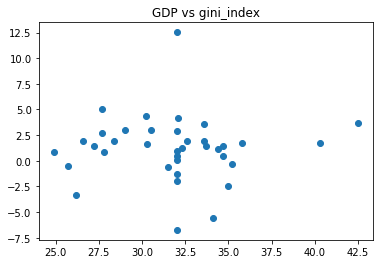

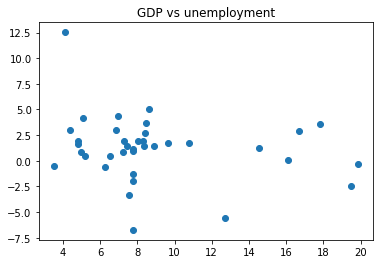

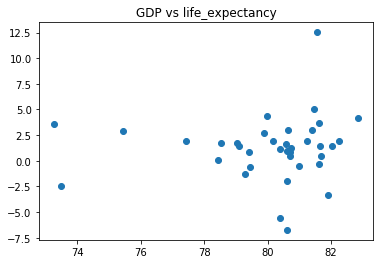

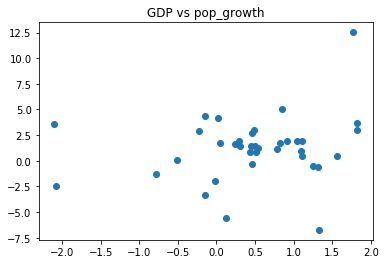

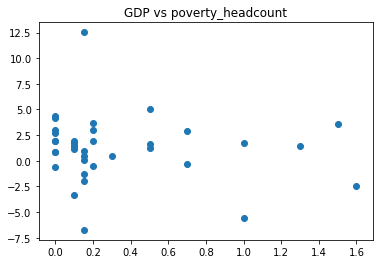

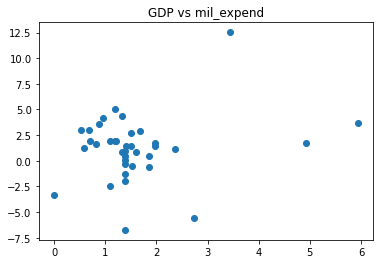

In [16]:
checkLinearRelationship(developed[0])

# Adding model

In [17]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [18]:
dataset = developed[5]
X = dataset.iloc[:,1:-1]
Y = dataset.iloc[:,-1]

In [19]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
summary = str(model.summary())

In [20]:
f = open("MLR_Summary_dev2015.txt","w+")
f.write(summary)
f.close()

In [21]:
cor_plot = dataset.corr()
cor_plot["gdp_percap"].sort_values(ascending=False)

gdp_percap           1.000000
pop_growth           0.094430
unemployment         0.060102
gini_index          -0.018625
poverty_headcount   -0.038244
life_expectancy     -0.066754
mil_expend          -0.290273
Name: gdp_percap, dtype: float64